# Analytische Methoden

In [2]:
%pylab inline

from ipywidgets import interact
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set default values for plotting:
rcParams['axes.titlesize']  = 14
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['lines.linewidth'] = 2

## Fundamentallösung der Diffusions- und Wärmeleitungsgleichung

Das Anfangswertproblem $u_t = \alpha u_{xx}$, $u(x,0)=u_0(x)$ hat die Lösung

$$u(x,t) = \int_{-\infty}^{\infty}u_0(y)G(x,y,t)dy =
\int_{-\infty}^{\infty}u_0(y)\dfrac{1}{2\sqrt{\alpha\pi t}}e^{-\dfrac{(x - y)^2}{4\alpha t}}dy.$$

Greensche Funktion (Fundamentallösung, impulse response): $G(x,y,t)=\dfrac{1}{2\sqrt{\alpha\pi t}}e^{-\dfrac{(x - y)^2}{4\alpha t}}$

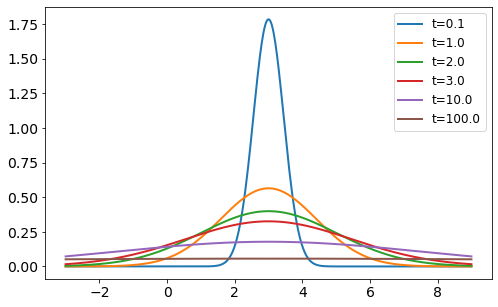

In [22]:
y = 3
x = linspace(-3, 9, 500)
alpha = 1

times = [0.1, 1, 2, 3, 10, 100]

figure(figsize=(8,5))
for t in times:
    G = 1/(1*sqrt(alpha*pi*t))*exp(-(x - y)**2/(4*alpha*t))
    plot(x, G, label="t={:.1f}".format(t))
legend();

## Separation der Variablen

**Beispiel:** Eine homogene Stange der Länge 1, isoliert an der Längsseite, ist anfangs auf Temperatur 1. Die Enden werden abrupt auf Temperatur 0 gebracht. Mathematische Problembeschreibung: Löse $u_t = u_{xx}$ mit der Anfangsbedingung $u(x,0)=1$ für $0<x<1$ und den Randbedingungen $u(0,t) = u(1,t) = 0$ für $t\geq 0$. Wie entwickelt sich das Temperaturprofil der Stange?

*Hinweis:* 
$\int_0^1 \sin(m\pi x)\sin(n\pi x) \,\text{d}x = 
\begin{cases} 
 0  & \mbox{if } m \neq n \\ 
1/2 & \mbox{if } m  =  n
\end{cases}$

*Quelle:* MacCluer, p. 194 ff.

*Lösung:*

$$u(x,t) = \frac{4}{\pi}\sum_{k=0}^{\infty} e^{-(2k+1)^2\pi^2t}\frac{\sin((2k+1)\pi x)}{2k+1}$$

In [23]:
x = linspace(0, 1, num= 100)
n_max = 10000

def my_f(t):
    u = zeros(shape(x))
    for n in range(1, n_max, 2):
        u = u + 4/pi*exp(-(n*pi)**2*t)*sin(n*pi*x)/n
    figure(figsize=(7,4))
    plot(x, u,'.-')
    ylim((0, 1.2))
    xlim((-.2, 1.2))
    xlabel('x')
    ylabel('u')
    grid(True)
    show()

interact(my_f, t=(0, 0.250, 0.005)); 

interactive(children=(FloatSlider(value=0.125, description='t', max=0.25, step=0.005), Output()), _dom_classes…

### Differential- und Integraltafel

$$\begin{align}
\sinh'(x) &= \cosh(x) \\
\cosh'(x) &= \sinh(x) \\
\int_0^1 \sin(m\pi x)\sin(n\pi x) \,\text{d}x &= 
\begin{cases} 
 0  & \mbox{für } m \neq n \\ 
1/2 & \mbox{für } m  =  n
\end{cases} \\
\int_{-\pi}^{\pi} \cos(nx) \cos(mx) \,\text{d}x &= 0 \text{ für } n\neq m \text{ und } \pi \text{ für } n=m \\
\int_{-\pi}^{\pi} \sin(nx) \sin(mx) \,\text{d}x &= 0 \text{ für } n\neq m \text{ und } \pi \text{ für } n=m \\
\int_{-\pi}^{\pi} \sin(nx) \cos(mx) \,\text{d}x &= 0 \text{ für alle } n, m
\end{align}$$

## Aufgaben

### Aufgabe 1: Lineare Transportgleichung, 3D-Plot, Wellengleichung

1. Lösen Sie die PDGL $2u_t + 3u_x=0$ mit der Anfangsbedingung $u(x,0) = \sin(x)$. 
2. Erstellen Sie einen 3D-Plot von $u(x,t)$ und interpretieren Sie die Lösung. 
3. Erfüllt $u(x,t)$ auch eine Wellengleichung? Falls ja, welche?

**Lösung:**

1. $\sin(x - \frac{3}{2}t)$
2. siehe Code unten
3. ja: $u_{tt} = (\frac{3}{2})^2u_{xx}$

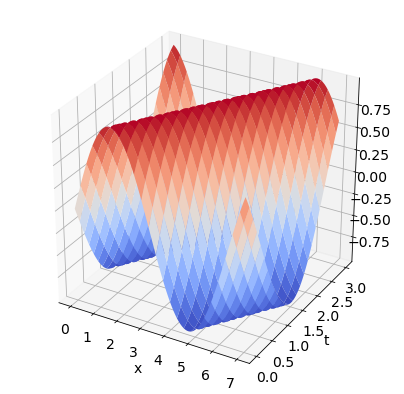

In [24]:
x = linspace(0, 7, 100)
t = linspace(0, 3, 100)

X, T = meshgrid(x, t)
U = sin(X - 1.5*T)

fig = figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, rstride=4, cstride=4, 
                linewidth=0, cmap=cm.coolwarm)
xlabel('x')
ylabel('t')
grid(True)

### Aufgabe 2: Wärmeleitungsgleichung, 3D-Plot

Die Anfangstemperaturverteilung einer Stange mit Ortskoordinate $0\leq x \leq 2\pi$ sei durch $u(x,0)=\sin(x)$ gegeben. 

1. Finden Sie die Lösung zur Wärmeleitungsgleichung $u_t = 0.1 u_{xx}$ mit Randbedingungen $u(0,t) = 0$ und $u(2\pi,t) = 0$. 
2. Erstellen Sie einen 3D-Plot von $u(x,t)$ für positive Zeiten  und interpretieren Sie die Lösung. 

*Hinweis:* Verwenden Sie, dass $u(x,t)= e^{at}\sin(bx)$ die PDGL $u_t = k u_{xx}$ für geeignete Werte von $a$ und $b$ löst.

**Lösung:**

1. $a=-kb^2$, $u(x,t) = e^{-0.1t}\sin(x)$
2. Siehe Code unten

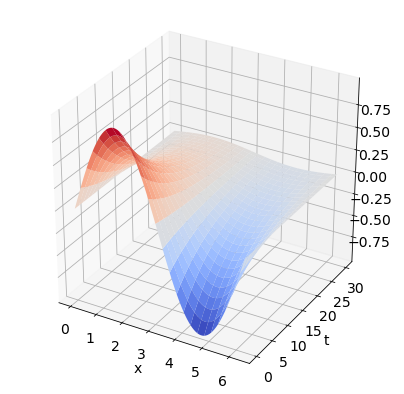

In [25]:
t = linspace(0, 30, 100)
x = linspace(0, 2*pi, 100)
T, X = meshgrid(t, x)
U = exp(-0.1*T)*sin(X)

fig = figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, T, U, rstride=4, cstride=4, 
                linewidth=0, cmap=cm.coolwarm)
xlabel('x')
ylabel('t')
grid(True)

### Aufgabe 3: Wellengleichung, allgemeine Lösung

1. Zeigen Sie, dass $u(x,t) = f(x + ct) + g(x - ct)$ für beliebige gegebene Funktionen $f$ und $g$ die Wellengleichung $u_{tt} = c^2 u_{xx}$ erfüllt. 
2. Wie interpretieren Sie die Lösung $u(x,t)$?

**Lösung:**

- Einsetzen in die Wellengleichung $u_{tt} = c^2 u_{xx}$
- Interpretation: zwei Wellen, die sich in entgegengesetzte Richtung ausbreiten

### Aufgabe 4: Wärmeleitungsgleichung, 3D-Plot

1. Zeigen Sie, dass $u(x,t) = \frac{1}{\sqrt{4\pi k t}}e^{-\frac{x^2}{4kt}}$ die Wärmeleitungsgleichung $u_t = k u_{xx}$ erfüllt. 
2. Erstellen Sie einen 3D-Plot von $u(x,t)$ für positive Zeiten und interpretieren Sie die Lösung.

**Lösung:** 

- Einsetzen in die PDGL $u_t = k u_{xx}$
- Interpretation: zerfließende Gaussglocke

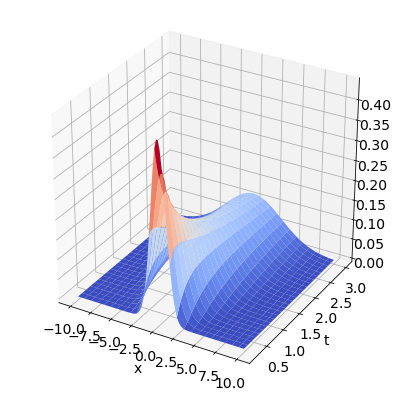

In [26]:
x = linspace(-10, 10, 100)
t = linspace(0.2, 3, 100)

X, T = meshgrid(x, t)

k = 2
U = 1/sqrt(4*pi*k*T)*exp(-X**2/(4*k*T))

fig = figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, rstride=4, cstride=4, 
                linewidth=0, cmap=cm.coolwarm)
xlabel('x')
ylabel('t')
grid(True)

### Aufgabe 5: Wellengleichung, Separation der Variablen

Die Amplitude $u(x,t)$ einer schwingenden Saite mit $0\leq x \leq 1$ und  Ausbreitungsgeschwindigkeit 1 erfüllt die Wellengleichung 

$$u_{tt}=u_{xx}.$$

Betrachten Sie folgende Rand- und Anfangsbedingungen:

$$
\begin{align*}
u(x,0)= 2x,     \quad & 0 \leq x \leq 0.5 \\
u(x,0)= 2 - 2x, \quad & 0.5  < x \leq 1   \\
u_t(x,0)=0,     \quad & 0 \leq x \leq 1   \\
u(0,t)=0,       \quad & t \geq 0          \\
u(1,t)=0,       \quad & t \geq 0
\end{align*}
$$

Aufgaben:

1. Beschreiben Sie die Rand- und Anfangsbedingungen.
2. Verwenden Sie die Methode der Separation der Variablen, um $u(x,t)$ zu berechnen.
3. Erstellen Sie mit Hilfe des Befehls `interact` einen Animationsplot der Lösung.
4. Wieviele unterschiedliche Töne (Oktaven nicht mitgezählt) sind in der Schwingung enthalten?

*Literatur:* 

- Lang, Pucker: p. 526f
- MacCluer Problem 4, p. 203ff

**Lösung:**

1. Die Saite wird zum Zeitpunkt $t=0$ in der Mitte bei $x=0.5$ auf die Höhe $u=1$ gezogen, daher die dreiecksförmige Anfangsbedingung. Die Saite bewegt sich zum Zeitpunkt $t=0$ nicht, weil $u_t(x,0)=0$. Die Saite ist an beiden Enden fest eingespannt.
2. Siehe Literaturangaben und Code. $u(x,t) = \sum_{n=1}^\infty c_n \sin(n\pi x)\cos(n\pi t)$ mit $c_n = \frac{8\sin(n\pi/2)}{n^2\pi^2}$.
3. Siehe Code.
4. Ein Ton mit Obertönen.

In [27]:
x = linspace(0, 1, num= 100)
n_max = 500

def my_f(t):
    u = zeros(shape(x))
    for n in range(1, n_max, 2):
        u = u + 8/pi**2*(-1)**((n-1)/2)/n**2*sin(n*pi*x)*cos(n*pi*t)
        
    fig = figure(figsize=(7,4))
    plot(x, u)
    ylim((-1.2, 1.2))        
    xlim((-.2, 1.2))
    xlabel('x')
    ylabel('u')
    grid(True)
    show()

interact(my_f, t=(0, 3, 0.025)); 

interactive(children=(FloatSlider(value=1.0, description='t', max=3.0, step=0.025), Output()), _dom_classes=('…

### Aufgabe 6: Laplacegleichung, Separation der Variablen

Die stationäre Temperaturverteilung $u(x,y)$ im 2-dim., rechteckigen Gebiet $0 \leq x,y \leq 1$ genügt der Laplacegleichung

$$\Delta u = 0.$$

Betrachten Sie folgende Randbedingungen:

- $u(0,y)=0, \quad 0\leq y \leq1$
- $u(1,y)=1, \quad 0\leq y \leq1$
- $u(x,0)=0, \quad 0\leq x \leq1$
- $u(x,1)=0, \quad 0\leq x \leq1$

Aufgaben:

1. Welche physikalischen Situationen können auf diese Weise modelliert werden?
2. Verwenden Sie die Methode der Separation der Variablen, um $u(x,y)$ zu berechnen.
3. Erstellen Sie einen 2D-Farbplot von $u(x,y)$ inkl. Isothermen und Wärmefluss. 
4. Wären die Temperaturen am Rand $u_1$ statt 0 und $u_2$ statt 1, dann empfiehlt die Literatur die Transformation $v = \dfrac{u - u_1}{u_2 - u_1}$. Wieso?

*Hinweis:* Verwenden Sie die Befehle `imshow`, `contour` und `streamplot`.

*Literatur:*

- Lang, Pucker: p. 517ff
- Mac Cluer: Problem 7, p. 208ff

**Lösung:**

1. stationäre Temperaturverteilung in einem 2-dimensionalen Raumgebiet/Material (in der 3. Dimension ist die Temperaturverteilung homogen) mit vorgegebenen Randtemperaturen, elektrostatisches Potential in einem ladungsfreien 2-dimensionalen Raumgebiet mit vorgegebenen Randwerten.

2. Siehe Literaturangaben und Code. $u(x,y) = \sum_{n=1}^\infty c_n \sinh(n\pi x) \sin(n\pi y)$ mit $c_n = \frac{4}{n\pi\sinh(n\pi)}$ für ungerade $n$  und $c_n=0$ für gerade $n$.

3. Siehe Code.

4. Da dadurch das Problem mit den allgemeineren Temperaturrandbedingungen $u_1$ und $u_2$ in das obige mit Temperaturrandbedingungen 0 und 1 transformiert wird. Die PDGL für $v$ ist wiederum die Laplacegleichung.

In [28]:
N = 50 # number of grid points
x = linspace(0,1,N)
y = linspace(0,1,N)

X, Y = meshgrid(x,y)

n_max = 100
U = zeros(shape(X)) # Temperatur
V = zeros(shape(X)) # Wärmefluss in x-Richtung
W = zeros(shape(X)) # Wärmefluss in y-Richtung
for n in range(1, n_max, 2):
    U = U + 4/(n*pi*sinh(n*pi))*sinh(n*pi*X)*sin(n*pi*Y)
    V = V - 4/sinh(n*pi)*cosh(n*pi*X)*sin(n*pi*Y)
    W = W - 4/sinh(n*pi)*sinh(n*pi*X)*cos(n*pi*Y)

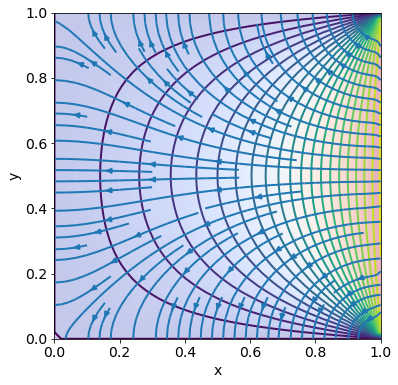

In [29]:
fig = figure(figsize=(6,6))
imshow(U, alpha= 0.3, extent=(0,1,0,1), cmap=cm.coolwarm)
contour(X, Y, U, 20)
streamplot(X, Y, V, W)
xlabel('x')
ylabel('y')
grid(False)

### Aufgabe 7: Wärmeleitungsgleichung, Separation der Variablen

Lösen Sie für $0 \leq x \leq 4$ und $0 \leq t$ die PDGL $u_{t}=2u_{xx}$ mit den Rand- und Anfangsbedingungen

- $u(0,t) = u(4,t) = 0$
- $u(x,0) = 25x$

und interpretieren Sie die Aufgabenstellung physikalisch.

*Quelle:* Murray, Spiegel: Schaum's Outlines - Advanced mathematics for engineers and scientists. p. 279, problem 12.48

**Lösung:**

$u(x,t) = -\frac{200}{\pi}\sum_{m=1}^{\infty} \frac{e^{-m^2\pi^2 t/8}\cos(m\pi)}{m} \sin(\frac{m\pi x}{4})$, siehe auch Code unten

In [ ]:
x = linspace(0, 4, num= 100)
n_max = 500

def my_f(t):
    u = zeros(shape(x))
    for n in range(1, n_max):
        u = u - 200*cos(n*pi)/(n*pi)*exp(-(n*pi)**2*t/8)*sin(n*pi*x/4)
        
    fig = figure(figsize=(7,4))
    plot(x, u)
    ylim((0, 110))        
    xlim((-.2, 4.2))        
    grid(True)
    show()

interact(my_f, t=(0, 1, 0.025));

### Aufgabe 8: Separation der Variablen

1. Lösen Sie über Separation der Variablen für $0 \leq x \leq 3$ und $0 \leq t$ die PDGL $u_{t}=2u_{xx}$ mit den Rand- und Anfangsbedingungen

    - $u(0,t) = u(3,t) = 0$
    - $u(x,0) = 5\sin(4\pi x) - 3\sin(8\pi x) + 2\sin(10\pi x)$

2. Interpretieren Sie die Aufgabenstellung physikalisch.

*Hinweis:* Die Anpassung an die Anfangsbedingung kann mittels Koeffizientenvergleich erfolgen.

*Quelle:* Murray, Spiegel: Schaum's Outlines - Advanced Mathematics for Engineers and Scientists. Problem 12.16, p. 266f.

**Lösung:** 

$u(x,t) = 5e^{-32\pi^2 t}\sin(4\pi x) - 3e^{-128\pi^2 t}\sin(8\pi x) + 2e^{-200\pi^2 t}\sin(10\pi x)$

### Aufgabe 9: Randbedingungen, Wärmefluss

1. Erklären Sie die drei Typen von Ranbedingungen bei der Wärmeleitungsgleichung!
2. Wie kann man in einem 3-dim. Raumgebiet aus der Lösung der Wärmeleitungsgleichung den Wärmefluss zu einem bestimmten Zeitpunkt und an einem bestimmten Ort berechnen?

**Lösung:** 

1. Farlow: Partial Differential Equations for Scientists and Engineers. Dover, 1993. Lesson 3 Boundary Conditions for Diffusion-Type Problems
2. [Wärmeleitfähigkeit](https://de.wikipedia.org/wiki/Wärmeleitfähigkeit): $\dot{q} = -k \nabla T$

### Aufgabe 10: Randbedingungen, Fundamentallösung

1. Welche steady-state Temperaturverteilung herrscht im Inneren einer 1-dim. modellierten Hauswand der Dicke 30 cm, die an einer Seite die Temperatur 20 $^\circ$C und an der anderen -10 $^\circ$C hat?

2. Welche PDGL und Randbedingungen erfüllt die Temperatur $u(x,t)$ eines 1-dim- Stabes der Länge $L$ und Temperaturleitfähigkeit $\alpha$, der an der Mantelfläche und am linken Ende isoliert ist und am rechten Ende in thermischem Kontakt mit einem Material (mit Wärmetransferkoeffizient $h$ und thermischer Konduktivitär $K$) der Temperatur $T(t)$ ist?

3. Wie kann man in einem 3-dim. Raumgebiet aus der Lösung der Wärmeleitungsgleichung den Wärmefluss zu einem bestimmten Zeitpunkt und an einem bestimmten Ort berechnen?

4. Erklären Sie in Worten den Begriff Greensche Funktion.

### Aufgabe 11: Randbedingungen

Im 2-dim. Raumgebiet $0 \leq x \leq 1$, $0 \leq y \leq 1$ sollen für die Wärmeleitungsgleichung $u_t = \alpha\Delta u$ folgende Randbedingungen gelten.

1. $u  (x,0,t) = g(t)$
2. $u_y(x,1,t) = 0$
3. $K u_x(0,y,t) = -f(t)$
4. $-u_x(1,y,t) = \lambda(u(1,y,t) - 10)$

Erstellen Sie eine Skizze und fügen Sie die physikalisch Interpretion jeder Randbedingung ein.

*Quelle:* Farlow: Partial Differential Equations for Scientists and Engineers. p. 25.

**Lösung:** 

1. Temperatur wird auf $g(t)$ gehalten.
2. thermische Isolation
3. vorgegebener Wärmefluss $f(t)$
4. Kontakt mit Umgebungstemperatur auf Höhe 10.

### Aufgabe 12: Wärmeleitung

Wir betrachten eine Hauswand der Dicke 50 cm, die an der Innenseite die Temperatur 20 $^\circ$C und an der Außenseite die Temperatur -5 $^\circ$C hat. Die Wand ist 2 Meter hoch. 
Das Material des ersten Höhenmeters erfüllt die PDGL $u_t = 2u_{xx}$ und hat eine Wärmeleitfähigkeit von 0.1 W/(mK).
Das Material des zweiten Höhenmeters erfüllt die PDGL $u_t = 3u_{xx}$ und hat eine Wärmeleitfähigkeit von 0.5 W/(mK).

1. Welche steady-state Temperaturverteilung herrscht im Inneren der Hauswand? Erstellen Sie eine Skizze. Begründen Sie Ihre Antwort, indem Sie zeigen, dass Ihre Lösung die jeweilige stationäre Wärmeleitungsgleichung erfüllt.
2. Berechnen und skizzieren Sie den Wärmefluss in der gesamten Wand.

**Lösung:** $x$ Meter normal in die Wand, $x=0$ bei Außenseite.

1. Temperatur $u(x) = -5 + 50x$ °C in jeder Höhe, erfüllt $u_{xx}=0$
2. Wärmefluss $\Phi = -Ku_x$: 5 $W/m^2$ bzw. 25 $W/m^2$

### Aufgabe 13: Separation der Variablen

1. Lösen Sie $u_t = 2u_{xx}$  für $0<x<1$ und $t\geq 0$ mit den Rand- und Anfangsbedingungen

   - $u(0,t)=0$
   - $u(1,t)=0$
   - $u(x,0)=x$ 

2. Interpretieren Sie die Aufgabenstellung physikalisch.
3. Erstellen Sie mit Hilfe des Befehls `interact` einen Animationsplot der Lösung.

*Quelle:* vgl. MacCluer, p. 194 ff.

**Lösungen:**

1. $u(x,t) = \sum_{n=1}^{\infty} \frac{-2\cos(n\pi)}{n\pi} e^{-2(n\pi)^2 t}\sin(n\pi x)$
2. Eine homogene Stange der Länge 1, isoliert an der Längsseite, ist anfangs auf Temperatur $x$. Die Enden werden abrupt auf Temperatur 0 gebracht. 

In [4]:
x = linspace(0, 1, num= 100)
n_max = 5000

def my_f(t):
    u = zeros(shape(x))
    for n in range(1, n_max + 1):
        u = u - 2*cos(n*pi)/(n*pi)*exp(-2*(n*pi)**2*t)*sin(n*pi*x)
    figure(figsize=(7,4))
    plot(x, u,'.-')
    ylim((0, 1.2))
    xlim((-.2, 1.2))
    grid(True)
    show()

interact(my_f, t=(0, 0.250, 0.005)); 

interactive(children=(FloatSlider(value=0.125, description='t', max=0.25, step=0.005), Output()), _dom_classes…